# Word2Vec Embedding Training and Visualization

This notebook demonstrates:
1. Training a Word2Vec model from raw text using streaming
2. Exploring semantic similarity and analogy
3. Visualizing word embeddings using dimensionality reduction


In [1]:
# import thư viện

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [ ]:
class SentenceIterator:
    def __init__(self, file_path):
        self.file_path = file_path

    def __iter__(self):
        with open(self.file_path, "r", encoding="utf-8") as f:
            for line in f:
                line = line.strip()
                if line:
                    yield simple_preprocess(line)




In [87]:
# load data và train mô hình

data_path = Path(
    "C:/Users/DoubleDD/HUS/NLP&DL/datasets/UD_English-EWT/en_ewt-ud-train.txt"
)

sentences = SentenceIterator(data_path)

model = Word2Vec(
    sentences=sentences,
    vector_size=150,
    window=10,
    min_count=5,
    workers=4,
    sg=1
)


In [88]:
# sematic similarity
model.wv.most_similar("computer", topn=5)


[('floor', 0.9944712519645691),
 ('condition', 0.994104266166687),
 ('round', 0.9938756227493286),
 ('ticket', 0.9933452606201172),
 ('effort', 0.9931646585464478)]

In [89]:
# analogy
model.wv.most_similar(
    positive=["woman", "king"],
    negative=["man"],
    topn=5
)


[('parakeet', 0.9868412017822266),
 ('rats', 0.9867873191833496),
 ('travelling', 0.9865846037864685),
 ('bag', 0.9864781498908997),
 ('opportunities', 0.9864281415939331)]

Visualization of Word Embeddings

Để quan sát các quan hệ ngữ nghĩa, thực hiện giảm số chiều của các vectơ từ được chọn từ 100 chiều xuống còn 2 chiều bằng cách sử dụng PCA.

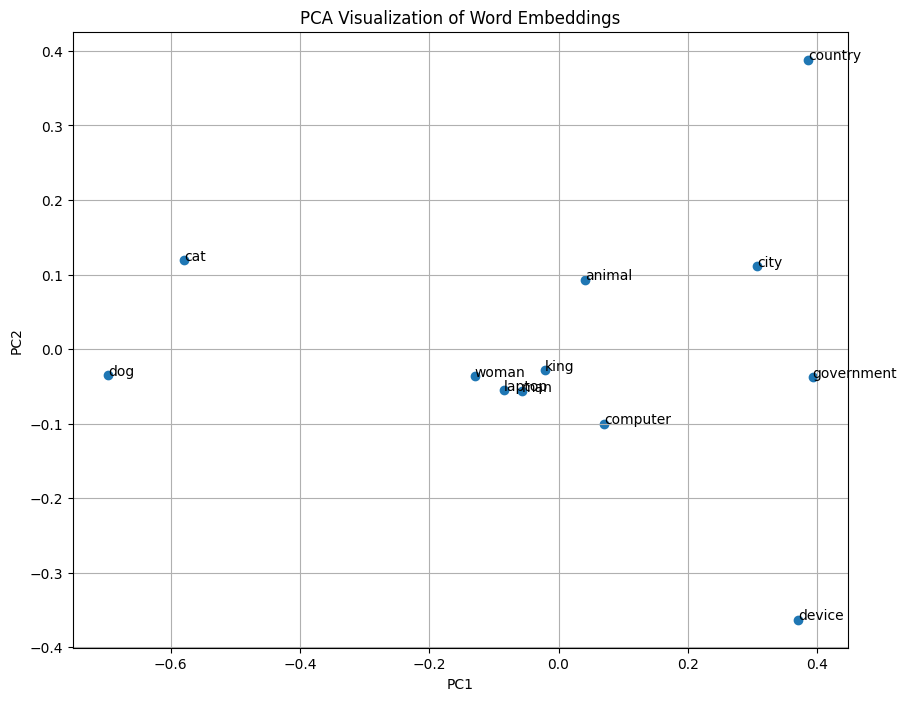

In [90]:
target_words = [
    "computer", "laptop", "desktop", "device",
    "king", "queen", "man", "woman",
    "dog", "cat", "animal",
    "city", "country", "government"
]

words = [w for w in target_words if w in model.wv]
vectors = np.array([model.wv[w] for w in words])

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

plt.title("PCA Visualization of Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
